# Análisis del Dataset Titanic
En este notebook, realizaremos un análisis exploratorio y entrenaremos un modelo de Machine Learning para predecir la supervivencia de los pasajeros del Titanic.

## Objetivos
1. Explorar el dataset e identificar relaciones entre variables.
2. Preprocesar los datos para limpiarlos y transformarlos según sea necesario.
3. Seleccionar características relevantes.
4. Entrenar un modelo de clasificación.
5. Evaluar y visualizar el desempeño del modelo.

## Paso 1: Importar bibliotecas necesarias
Comenzamos importando las bibliotecas que utilizaremos para el análisis y modelado. (en nuestro entorno virtual pip install pandas numpy matplotlib seaborn scikit-learn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set_style("whitegrid")

## Paso 2: Cargar el dataset
Cargamos el dataset Titanic-Dataset.csv para inspeccionarlo y verificar que las columnas sean adecuadas para el análisis.

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
print("Vista inicial del dataset:")
print(df.head())

Vista inicial del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450  

## Paso 3: Análisis exploratorio
Exploramos el dataset para comprender la estructura, identificar valores faltantes y observar relaciones entre variables.

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Estadísticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.30

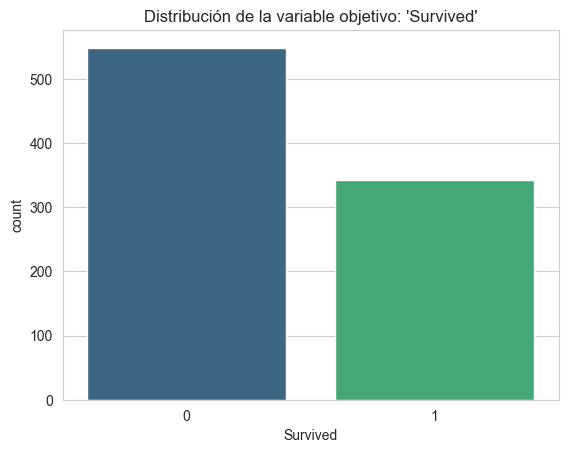

In [5]:
# Información general del dataset
print("Información general del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización de la variable 'Survived'
sns.countplot(data=df, x='Survived', hue='Survived', palette='viridis', legend=False)
plt.title("Distribución de la variable objetivo: 'Survived'")
plt.show()

## Paso 4: Preprocesamiento de datos
Realizamos el tratamiento de valores faltantes, eliminamos columnas irrelevantes y transformamos variables categóricas en variables numéricas.

In [6]:
# Rellenar valores faltantes en 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Rellenar valores faltantes en 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar columnas no relevantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar el dataset después del preprocesamiento
print("Dataset después del preprocesamiento:")
print(df.head())


Dataset después del preprocesamiento:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## Paso 5: Selección de características
Seleccionamos las variables más relevantes basándonos en la correlación con la variable objetivo ('Survived').

In [7]:
# Selección de características (X) y variable objetivo (y)
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

## Paso 6: Dividir los datos en Train/Test
Dividimos el dataset en conjuntos de entrenamiento y prueba para evaluar el modelo de manera efectiva.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Paso 7: Entrenar el modelo
Entrenamos un modelo de Regresión Logística utilizando el conjunto de entrenamiento.

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Paso 8: Evaluación del modelo
Evaluamos el desempeño del modelo en el conjunto de prueba y generamos métricas como la precisión, recall y F1-score.

In [10]:
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Interpretación del Reporte:

#### **Por clase:**
1. **Clase 0 (No sobrevivió):**
   - **Precisión:** El 83% de las predicciones de "No sobrevivió" fueron correctas.
   - **Recall:** El 86% de las personas que no sobrevivieron fueron correctamente identificadas.
   - **F1-Score:** Promedio armónico de precisión y recall, 0.84.

2. **Clase 1 (Sobrevivió):**
   - **Precisión:** El 79% de las predicciones de "Sobrevivió" fueron correctas.
   - **Recall:** El 74% de las personas que sobrevivieron fueron correctamente identificadas.
   - **F1-Score:** Promedio armónico de precisión y recall, 0.76.

#### **Métricas globales:**
- **Accuracy:** El modelo tuvo un **81% de precisión global**, es decir, el 81% de las predicciones totales fueron correctas.
- **Macro Average:** Promedio simple de las métricas (no pondera por tamaño de clase).
- **Weighted Average:** Promedio ponderado por el número de muestras en cada clase.


### Análisis del Rendimiento:

- El modelo tiene mejor desempeño para la clase 0 ("No sobrevivió") que para la clase 1 ("Sobrevivió").
- La diferencia de rendimiento podría deberse a un desbalance de clases o a que las características no diferencian bien a los supervivientes.



### Siguientes pasos para mejorar el modelo:
1. **Evaluar desbalance de clases:**
   - Verificar si hay más muestras de la clase 0 que de la clase 1.
   - Si es así, aplicar técnicas como sobremuestreo de la clase minoritaria (por ejemplo, SMOTE) o ajustar pesos en el modelo.

2. **Probar con diferentes modelos:**
   - Modelos como Árboles de Decisión, Random Forest, o Gradient Boosting podrían mejorar el rendimiento.
   - Ajustar hiperparámetros utilizando herramientas como GridSearchCV.

3. **Seleccionar más características:**
   - Investigar si hay más variables (o combinaciones de variables) que puedan ser relevantes.

4. **Evaluar métricas adicionales:**
   - Analizar la matriz de confusión para entender qué tipos de errores son más comunes (falsos positivos o falsos negativos).